In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.
Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import
train_test_split from sklearn.preprocessing
import StandardScaler from sklearn import
datasets boston = datasets.load_boston()
features = pd.DataFrame(boston.data,
columns=boston.feature_names)
targets = boston.target

NOTE:The solution shared throughGithub should contain the source code used and the screenshot of the output.

3.Output
This assignment consists of 200 marks and has to be submitted in
.ipynb/PDF format in the upcoming session for evaluation.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.preprocessing import StandardScaler  
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features['Price'] = boston.target

In [104]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [21]:
from sklearn import preprocessing

C:\Users\vindh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


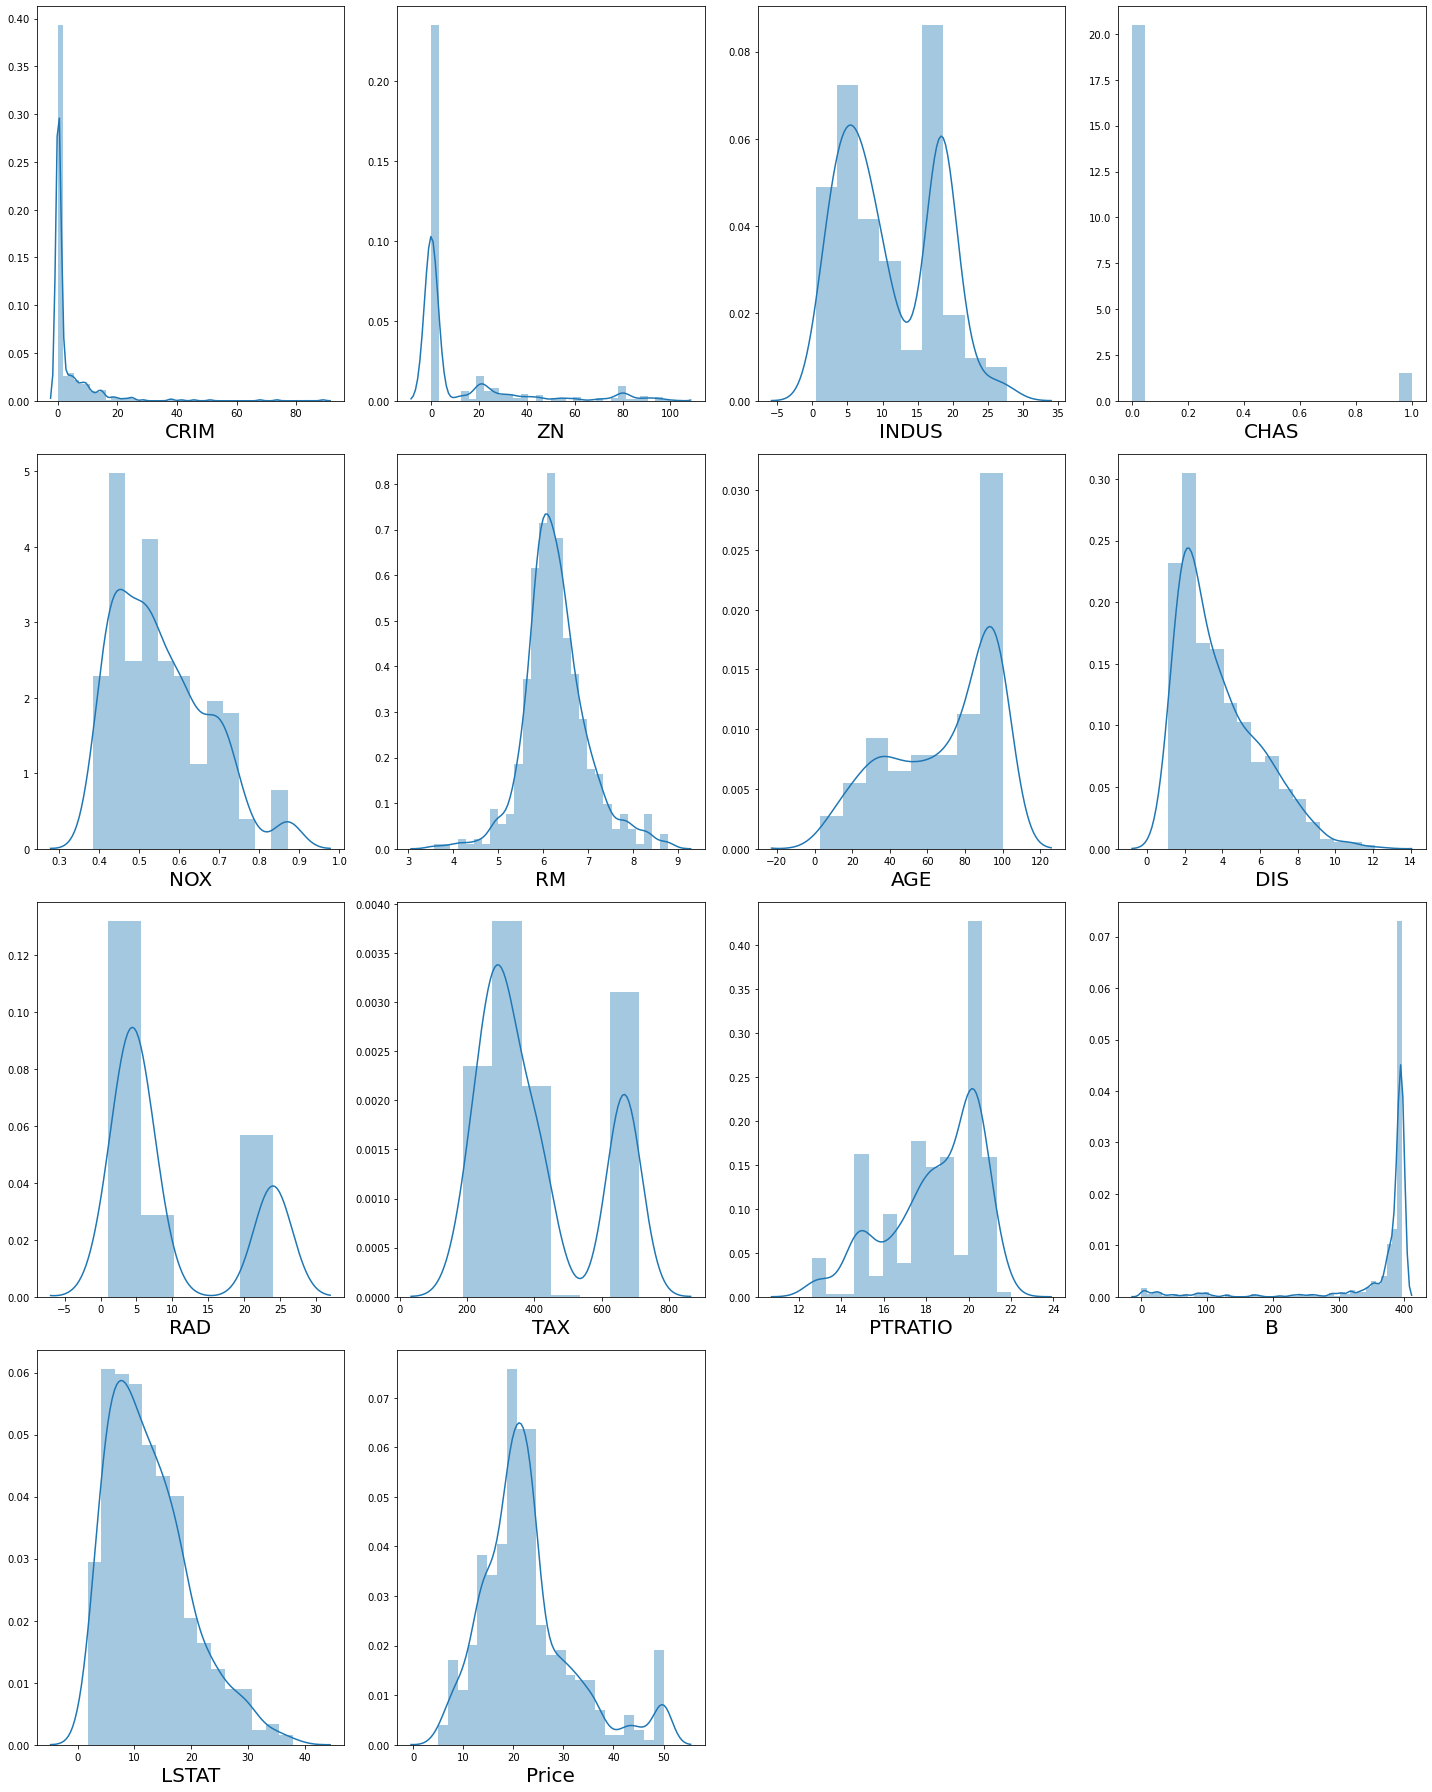

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in features:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

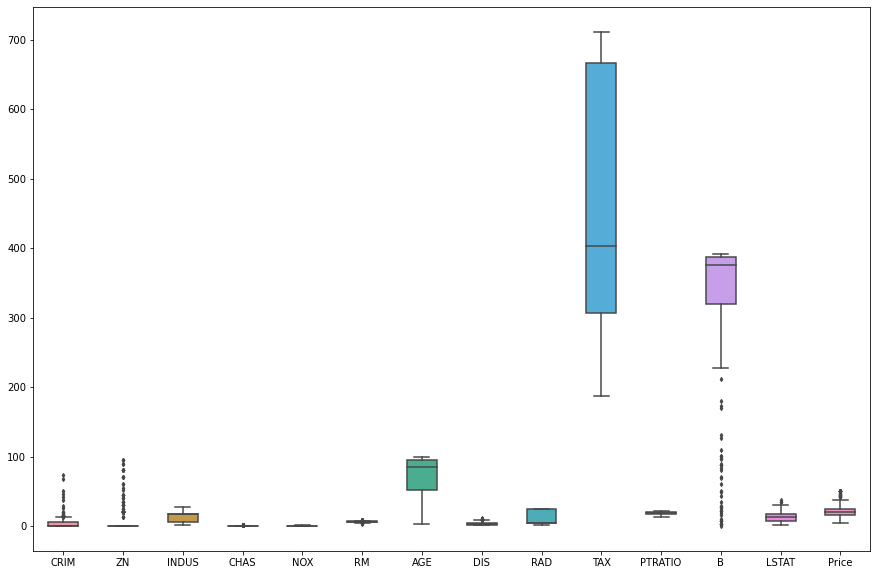

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=features, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
q = features['B'].quantile(0.50)
# we are removing the top 5% data from the Insulin column
features  = features[features['B']<q]

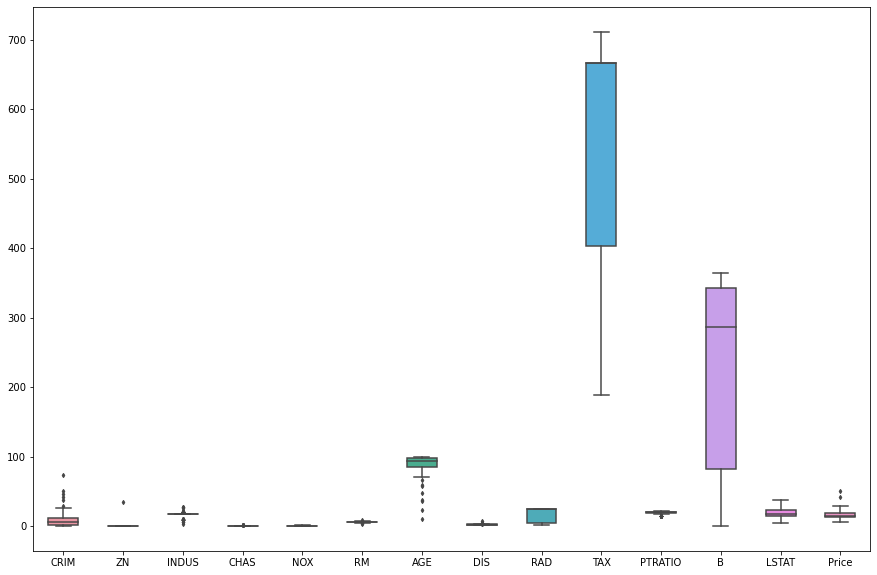

In [491]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [25]:
x=features.drop(columns = ['Price'])

In [26]:
y=features.Price

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
x_scaled=sc.fit_transform(x)

In [30]:
df=pd.DataFrame(x_scaled)

C:\Users\vindh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


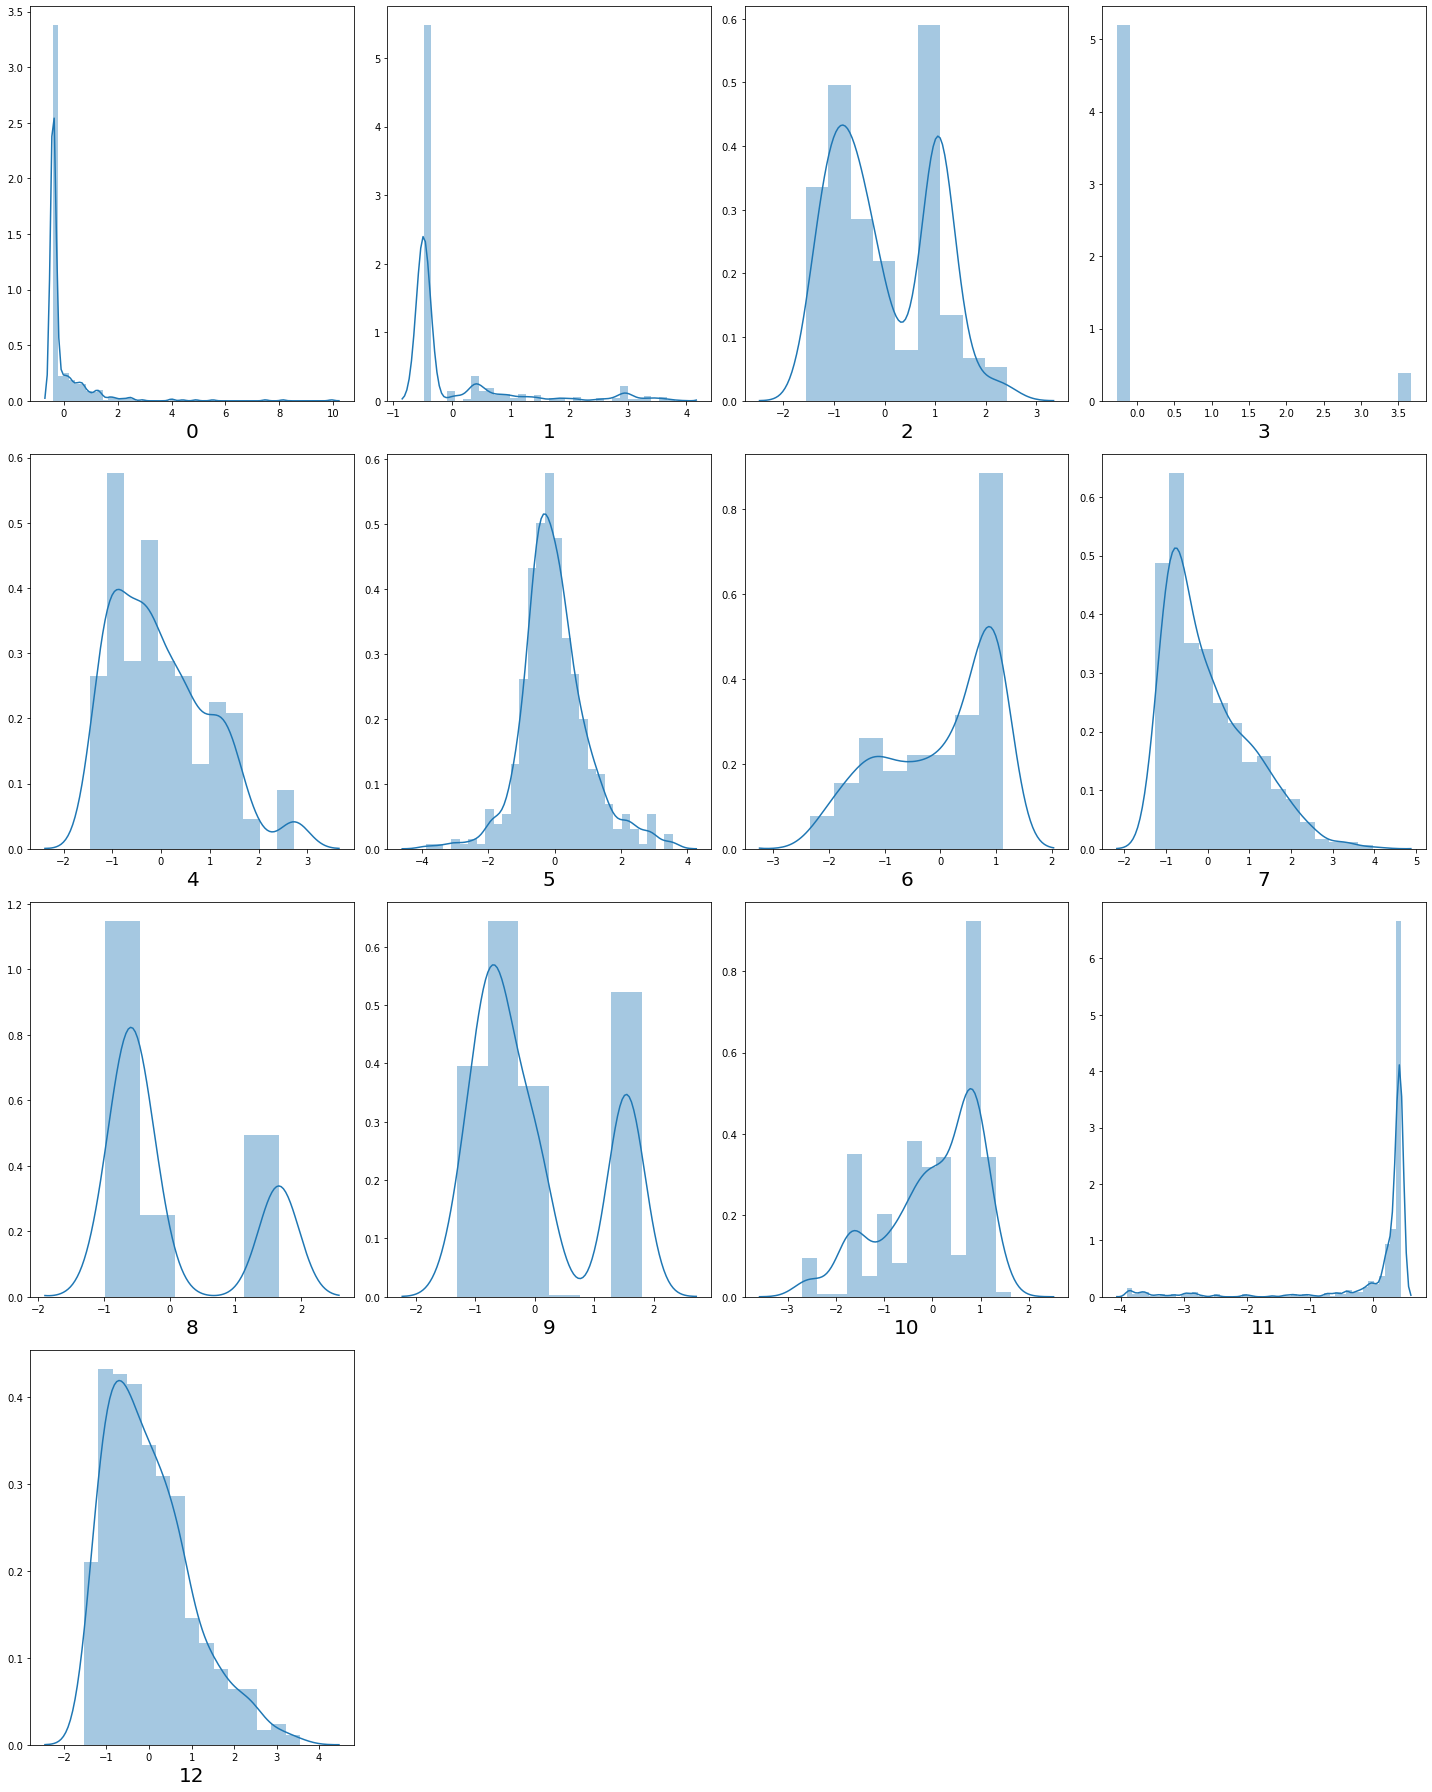

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30, random_state= 355)

In [32]:
rand_clf = RandomForestRegressor(random_state=6)

In [33]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [34]:
rand_clf.score(x_test,y_test)

0.8190759803635543

In [35]:
rand_clf.score(x_train,y_train)

0.9812353069053734

In [79]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [81]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [83]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 2036 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3860 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4596 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5396 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6260 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7188 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [ ]:
grid_search.best_params_

In [402]:
rand_clf = RandomForestRegressor(max_depth = 11,max_features = 'sqrt',min_samples_leaf = 1,min_samples_split= 5,
 n_estimators = 21,random_state=6,bootstrap=True,criterion= 'mae')

In [403]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=11, max_features='sqrt',
                      min_samples_split=5, n_estimators=21, random_state=6)

In [404]:
rand_clf.score(x_test,y_test)

0.8909465244556771

In [406]:
rand_clf.score(x_train,y_train)

0.95816295306556